In [1]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
def get_reviews_and_ratings(url):
    reviews_and_ratings = []
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    review_divs = soup.find_all('div', class_='text show-more__control')
    rating_spans = soup.find_all('span', class_='rating-other-user-rating')

    for review_div, rating_span in zip(review_divs, rating_spans):
        review = review_div.text
        rating = int(rating_span.find('span').text)
        reviews_and_ratings.append({'review': review, 'rating': rating})

    return reviews_and_ratings

# Example URL for the movie reviews page (Replace with the actual URL)
url = 'https://www.imdb.com/title/tt27995594/reviews/?ref_=tt_ov_rt'
reviews_and_ratings = get_reviews_and_ratings(url)
print(f"Scraped {len(reviews_and_ratings)} reviews and ratings.")

Scraped 25 reviews and ratings.


In [3]:
# Print the first 5 reviews and their ratings
for i, review_and_rating in enumerate(reviews_and_ratings[:5]):
    print(f"Review {i+1}:")
    print(f"Rating: {review_and_rating['rating']}")
    print(f"Review: {review_and_rating['review']}\n")

Review 1:
Rating: 8
Review: Movie is very much entertaining and brings new content in Horror/Ghost version.Keep in mind its a horror-comedy so it will lack in horror part for sure.Highlighting part is acting-casting-locations-story tellingCasting suits perfectly coz some actors are regional which makes it much more relatable.Further comedy is not forced and its natural. Not cringe jokes or movie reference jokesPlus making this universe such a diversified urges you to want some more.From east side of India in Bhediya to Munjya in Maharashtra ...Hats off ...Hope to see the logical and entertaining connection with other movies of this universe.

Review 2:
Rating: 6
Review: Munjya, the latest entrant in the horror-comedy universe, offers a blend of spooky thrills and light-hearted moments, though it falls short of the standards set by "Stree" and "Bhediya." But, it still manages to be a marginally better watch than "Roohi." Munjya is not the perfect horror comedy, but it brings something n

In [4]:
def analyze_sentiments(reviews_and_ratings):
    sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}

    for review_and_rating in reviews_and_ratings:
        review = review_and_rating['review']
        blob = TextBlob(review)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiments['positive'] += 1
        elif polarity < 0:
            sentiments['negative'] += 1
        else:
            sentiments['neutral'] += 1

    return sentiments

sentiments = analyze_sentiments(reviews_and_ratings)
print(f"Positive reviews: {sentiments['positive']}")
print(f"Negative reviews: {sentiments['negative']}")
print(f"Neutral reviews: {sentiments['neutral']}")

Positive reviews: 24
Negative reviews: 1
Neutral reviews: 0


In [5]:
total_reviews = len(reviews_and_ratings)
positive_percentage = (sentiments['positive'] / total_reviews) * 100
negative_percentage = (sentiments['negative'] / total_reviews) * 100
neutral_percentage = (sentiments['neutral'] / total_reviews) * 100

print(f"Total reviews: {total_reviews}")
print(f"Positive reviews: {positive_percentage:.2f}%")
print(f"Negative reviews: {negative_percentage:.2f}%")
print(f"Neutral reviews: {neutral_percentage:.2f}%")

Total reviews: 25
Positive reviews: 96.00%
Negative reviews: 4.00%
Neutral reviews: 0.00%


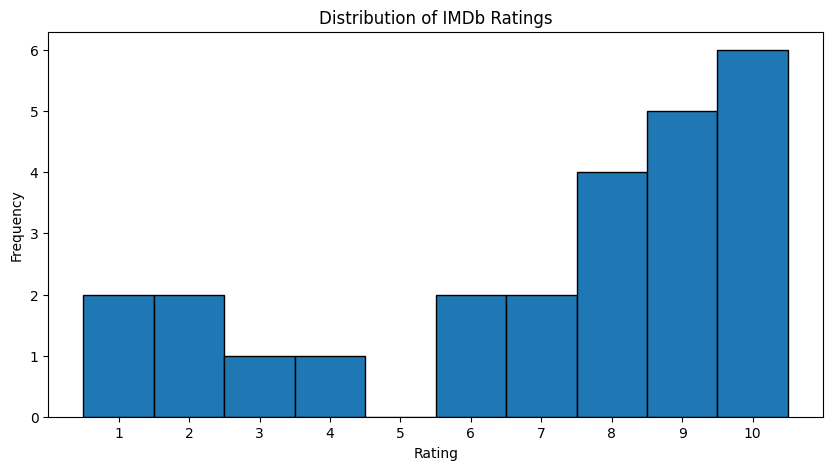

In [6]:
def plot_ratings_distribution(reviews_and_ratings):
    ratings = [review_and_rating['rating'] for review_and_rating in reviews_and_ratings]
    plt.figure(figsize=(10, 5))
    plt.hist(ratings, bins=range(1, 12), edgecolor='black', align='left')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of IMDb Ratings')
    plt.xticks(range(1, 11))
    plt.show()

plot_ratings_distribution(reviews_and_ratings)